
1.1[鸢尾花数据集3D可视化](https://blog.csdn.net/weixin_41855010/article/details/104487579)

In [1]:
pip install pyecharts

     |████████████████████████████████| 135 kB 4.3 MB/s 
     |████████████████████████████████| 130 kB 40.8 MB/s 


In [2]:
from sklearn import datasets
import pandas as pd
from pyecharts import options as opts
from pyecharts.charts import Scatter3D
from pyecharts.faker import Faker

iris = datasets.load_iris()
iris_df = pd.DataFrame({
        'x0':[iris.data[i][0] for i in range(len(iris.data))],
        'x1':[iris.data[i][1] for i in range(len(iris.data))],
        'x2':[iris.data[i][2] for i in range(len(iris.data))],
        'x3':[iris.data[i][3] for i in range(len(iris.data))],
        'type':iris.target
    })

#典型的DataFrame数据筛选操作（方括号内的布尔表达式）
df_type0=iris_df[iris_df.type==0]
df_type1=iris_df[iris_df.type==1]
df_type2=iris_df[iris_df.type==2]

data_type0=[[df_type0.x0.iloc[i],df_type0.x1.iloc[i],df_type0.x2.iloc[i]] for i in range(df_type0.shape[0])]
data_type1=[[df_type1.x0.iloc[i],df_type1.x1.iloc[i],df_type1.x2.iloc[i]] for i in range(df_type1.shape[0])]
data_type2=[[df_type2.x0.iloc[i],df_type2.x1.iloc[i],df_type2.x2.iloc[i]] for i in range(df_type2.shape[0])]

def scatter3d_base() -> Scatter3D:
    c = (
        Scatter3D()
        .add("", data_type0)
        .add("", data_type1)
        .add("", data_type2)
        .set_global_opts(
            title_opts=opts.TitleOpts("Wlm_irisclf"),
            # visualmap_opts=opts.VisualMapOpts(range_color=Faker.visual_color),
            # visualmap_opts=opts.VisualMapOpts(range_color=['#ff0000','#00ff00','#0000ff']),        
        )
        .set_colors(['#ff0000','#00ff00','#0000ff'])
    )
    return c

iris_scatter3d = scatter3d_base()
iris_scatter3d.render()


'/content/render.html'

2.1 Sklearn的svm.SVC模型调用

训练集正确率： 0.8571428571428571
测试集正确率： 0.7111111111111111
测试集真实值:
 [2. 1. 1. 0. 2. 1. 1. 2. 0. 2. 0. 2. 1. 0. 2. 2. 2. 1. 2. 1. 2. 2. 0. 1.
 1. 2. 0. 0. 0. 1. 0. 0. 0. 1. 1. 0. 1. 2. 1. 0. 2. 0. 1. 0. 1.]
测试集预测值:
 [2. 2. 2. 0. 2. 1. 2. 1. 0. 2. 0. 1. 1. 0. 2. 2. 1. 2. 1. 2. 2. 2. 0. 2.
 1. 2. 0. 0. 0. 2. 0. 0. 0. 1. 1. 0. 2. 2. 1. 0. 2. 0. 1. 0. 2.]
decision_function:
 [[ 2.22910515 -0.18590652  0.838745  ]
 [-0.22242179  2.19983866  1.1123515 ]
 [ 2.22881417 -0.18269263  0.83532031]
 [-0.22858691  2.22857628  1.00010761]
 [-0.22294887  1.0000952   2.22293842]
 [-0.22626201  2.22223833  1.03377645]
 [-0.16930523  0.83605898  2.22222188]
 [ 2.22221057 -0.17899278  0.8478301 ]
 [-0.21882244  2.20087806  1.09427475]
 [ 2.22881417 -0.18269263  0.83532031]
 [-0.22390613  2.22283149  1.00959059]
 [ 2.22541946 -0.18384234  0.84596544]
 [ 2.22220798 -0.17886194  0.84765703]
 [-0.20675622  0.91040933  2.22225937]
 [-0.22395186  1.11906442  2.19955915]
 [ 2.22221311 -0.17977866  0.84891817]
 [-0.225

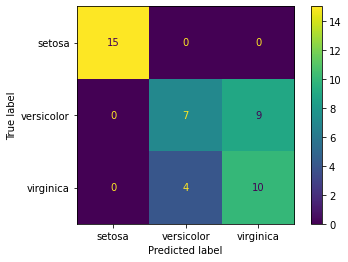

In [3]:
from sklearn import svm
from sklearn import metrics
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.utils import shuffle
from sklearn.model_selection import RepeatedKFold
from sklearn.datasets import load_iris
from sklearn.metrics import confusion_matrix

# 将label与数字对应，简化数据集
def Iris_label(s):
    it = {b'Iris-setosa': 0, b'Iris-versicolor': 1, b'Iris-virginica': 2}
    return it[s]

# 载入数据
path = '/content/Iris.data'
data = np.loadtxt(path, dtype=float, delimiter=',', converters={4: Iris_label})

# 在第4列之后进行切割，切割成2份
x, y = np.split(data, indices_or_sections=(4,), axis=1)
x = x[:, 0:2]
# 打乱数据集，使结果更加准确
x, y = shuffle(x, y, random_state=123)
# 划分训练集与测试集
train_data, test_data, train_label, test_label = train_test_split(x, y, random_state=1, train_size=0.7, test_size=0.3)

# 训练
classifier = svm.SVC(C=1, kernel='rbf', gamma=10)
classifier.fit(train_data, train_label.ravel())

# 计算准确率
print('训练集正确率：',classifier.score(train_data,train_label))
print('测试集正确率：',classifier.score(test_data, test_label))
print ('测试集真实值:\n', test_label.reshape(45,))
print ('测试集预测值:\n', classifier.predict(test_data))
train_predict = classifier.predict(train_data)
test_predict = classifier.predict(test_data)

# 输出决策函数
print('decision_function:\n', classifier.decision_function(train_data))

# 混淆矩阵
cm=confusion_matrix(test_label,test_predict)
labels = load_iris().target_names
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot()


findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


grid_test = 
 [[4.3       2.       ]
 [4.3       2.0120603]
 [4.3       2.0241206]
 ...
 [7.9       4.3758794]
 [7.9       4.3879397]
 [7.9       4.4      ]]
grid_hat = 
 [0. 0. 0. ... 2. 2. 2.]


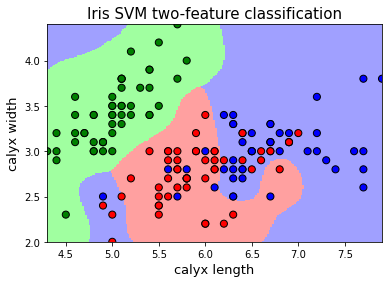

In [4]:
##绘图
import matplotlib as mpl
#确定坐标轴范围，x，y轴分别表示两个特征
x1_min, x1_max = x[:, 0].min(), x[:, 0].max()  # 第0列的范围
x2_min, x2_max = x[:, 1].min(), x[:, 1].max()  # 第1列的范围
x1, x2 = np.mgrid[x1_min:x1_max:200j, x2_min:x2_max:200j]  # 生成网格采样点
grid_test = np.stack((x1.flat, x2.flat), axis=1)  # 测试点
grid_hat = classifier.predict(grid_test)
print( 'grid_test = \n',grid_test ) 
print( 'grid_hat = \n',grid_hat ) 
grid_hat = grid_hat.reshape(x1.shape)  # 使之与输入的形状相同
#指定默认字体
mpl.rcParams['font.sans-serif'] = [u'SimHei']
mpl.rcParams['axes.unicode_minus'] = False
#绘制
cm_light = mpl.colors.ListedColormap(['#A0FFA0', '#FFA0A0', '#A0A0FF'])
cm_dark = mpl.colors.ListedColormap(['g', 'r', 'b'])
plt.pcolormesh(x1, x2, grid_hat, cmap=cm_light)
plt.scatter(x[:, 0], x[:, 1], c=y, edgecolors='k', s=50, cmap=cm_dark)  # 样本
plt.scatter(test_data[:, 0], test_label[:, :], s=120, facecolors='none', zorder=10)  # 圈中测试集样本
plt.xlabel(u'calyx length', fontsize=13)
plt.ylabel(u'calyx width', fontsize=13)
plt.xlim(x1_min, x1_max)
plt.ylim(x2_min, x2_max)
plt.title(u'Iris SVM two-feature classification', fontsize=15)
# plt.grid()
plt.show()

2.2修改超参C与gamma值

2.2.1交叉验证实现

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


最高准确率： 0.7809523809523808


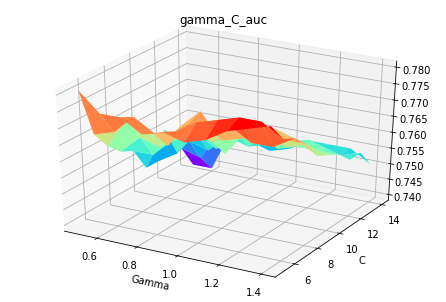

In [7]:
X = []
Y = []
Z = []
M = []
for C in range(5, 15, 1):
    for gamma in range(5, 15, 1):
        # 重复五次五折交叉验证
        rbk = RepeatedKFold(n_splits=5, n_repeats=5, random_state=12)
        accuracy = cross_val_score(svm.SVC(C=C / 10, kernel='rbf', gamma=gamma), train_data, train_label.ravel(), cv=rbk, scoring='accuracy').mean()
        X.append(C / 10)
        Y.append(gamma)
        Z.append(accuracy)
        M.append((C / 10, gamma, accuracy))
#print(M)
print('最高准确率：',max(Z))

X = np.array(X).reshape(10,10)
Y = np.array(Y).reshape(10,10)
Z = np.array(Z).reshape(10,10)
 
#绘制三维图形
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = Axes3D(fig)
ax.plot_surface(X,Y,Z,rstride=1,cstride=1,cmap=plt.get_cmap('rainbow'))
# ax.scatter(Y,X,Z,c='r')
plt.xlabel('Gamma')
plt.ylabel('C')
plt.title('gamma_C_auc')
plt.show()


2.2.2交叉验证网格搜索算法

In [22]:
from sklearn.model_selection import GridSearchCV
C_range = []
gamma_range = []
for C in range(1, 15, 1):
    C_range.append(C / 10)

for gamma in range(1, 11, 1):
    gamma_range.append(gamma)

param_grid = dict(gamma=gamma_range, C=C_range)
print(param_grid)
rbk = RepeatedKFold(n_splits=8, n_repeats=10, random_state=12)
grid = GridSearchCV(svm.SVC(kernel='rbf'), param_grid=param_grid, cv=rbk)
grid.fit(train_data, train_label.ravel())

print("The best parameters are %s with a score of %0.2f" % (grid.best_params_, grid.best_score_))
classifier = svm.SVC(C=2, kernel='rbf', gamma=1)
classifier.fit(train_data, train_label.ravel())
# 计算准确率
print("train:", classifier.score(train_data, train_label))
print("test:", classifier.score(test_data, test_label))

{'gamma': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10], 'C': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 1.1, 1.2, 1.3, 1.4]}
The best parameters are {'C': 0.2, 'gamma': 1} with a score of 0.80
train: 0.8285714285714286
test: 0.7555555555555555
